# **Introduction**
Malaysia, a country renowned for its strong auto industry, boasts a booming used automobile industry. Given that it offers a wide spectrum of consumers reasonably priced transportation options, the used automobile market is an essential part of the nation's economy. Numerous elements, such as vehicle maker, model, year of manufacturing, engine capacity, type of transmission, mileage, color, type of car, and price, affect the dynamics of this market.
Understanding the dynamics of used car pricing can provide valuable insights for both consumers and businesses.<br> <br>
This dataset, which includes detailed information on used car prices in Malaysia, offers an opportunity to explore into various aspects that influence car valuations.
# **Dataset Description**
This dataset contains information about Malaysia's used car prices, encompassing details such as car maker, model, year, engine capability, transmission, mileage, color, car type and price. The dataset is useful for a number of machine learning and data analysis tasks, such as understanding market trends and forecasting used car prices. It is made up of the following columns:



*   **Description**:  A brief description of the car and any promotional offers.
*   **Link**: A URL linking to the detailed listing of the car.
*   **Make:** The brand or company that produced the car (e.g., Perodua).
*   **Model:** The specific model of the car (e.g., Myvi, Alza).
*   **Year:** The year the car was manufactured.
*   **Engine Capability:** The size of the car's engine in cubic centimeters (cc).
*   **Transmission:** The type of transmission system (automatic or manual)
*   **Mileage** The total distance the car has traveled.
*   **Color:** The color of the car.
*   **Car Type:** The category or the type of car.
*   **Updated:** The date when the listing was last updated.
*   **Price:** The selling price of the used car.

# **Real-life Problem or Issue in Malaysia: Managing the Complexities of the Used Car Market**
## **Issue: Price Uncertainty and Market Inefficiency in the Malaysian Used Car Market**

There are multiple challenges that the Malaysian used car market faces that affect consumers as well as sellers. One of the main problems is price uncertainty, which is impacted by a number of variables like the make and model of the car, its year of manufacturing, its engine capacity, its type of transmission, its mileage, and its overall state. Because of this pricing volatility, it is challenging for consumers to determine a used car's fair market value, which raises a number of important issues:
1. **Price Uncertainty:** <br>Due to lack of standardized pricing, There are no standardized pricing methods for used card, which results in great price variations for similar vehicles. This makes it difficult for consumers to price their cars competitively and for buyers to determine a reasonable price. Sellers may also overprice cars or hide critical information, leading to a lack of trust in transactions.

2. **Quality and Reliability Concerns:**<br> Hidden issues about certains cars are concealed because of various factors such as not properly maintaining the vehicles, in which these very issues lead to reliability concerns for potentials buyers. Often, buyers lack information about a car's history, including previous accidents, repairs and other critical information which may complicate the decision-making process.
3. **Consumer Trust and Transparency:** <br>
Due to unequal access to information, buyers and sellers frequently develop mistrust. It is possible for buyers to be misinformed about a car's actual condition or reasonable price, and for sellers to withhold information that is important. <br><br>



Analyzing the provided dataset can aid in directing this project aim to address these issues by Developing predictive models to accurately estimate the fair price of used cars based on various features, Identifying patterns and trends that can aid consumers make more informed decisions, Highlighting the need for comprehensive vehicle history reports and Providing insights that can help the market to promote more sustainable practices that can attract more consumers.

# **Implementation Overview**
In this section, we examine how our suggested approach may be utilized in practice to examine and comprehend patterns in Malaysian used cars prices. Building on the knowledge from the previous discussion, we will describe every stage of the implementation process. We aim to find important trends and factors influencing car costs by utilizing our dataset and applying analytical techniques. This application provides a real-world example of how data-driven methods might improve decision-making in the automotive market.

## Data Exploration
This Python script explores a dataset (Malaysia_Final_CarList_Compiled.csv) containing information about used car prices in Malaysia. It uses the Pandas library for data manipulation and analysis.

In [8]:
import pandas as pd

# Define the file path of the dataset
file_path = 'Malaysia_Final_CarList_Compiled.csv'

# Read the first 100 rows of the dataset into a Pandas DataFrame
car_data = pd.read_csv(file_path, nrows=100)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(car_data.head())

# Display basic information about the dataset (columns, data types, non-null counts)
print("\nInformation about the dataset:")
print(car_data.info())

# Display descriptive statistics of the dataset, including categorical variables
print("\nDescriptive statistics of the dataset:")
print(car_data.describe(include='all'))

First few rows of the dataset:
                                                Desc  \
0  2015 Perodua Myvi 1.5 S.E WITH CRAZY DISKAUN U...   
1  2015 Perodua Myvi 1.5 ADVANCE WITH CRAZY DISKA...   
2  2015 Perodua Alza 1.5 (A) SE WITH DISKAUN UP T...   
3  2015 Perodua Myvi 1.5 S.E WITH CRAZY DISKAUN U...   
4                2015 Perodua Alza 1.5 Advance Wagon   

                                                Link     Make Model  Year  \
0  /new-cars/2521373/2015-perodua-myvi-1-5-s-e-wi...  Perodua  Myvi  2015   
1  /new-cars/2519379/2015-perodua-myvi-1-5-advanc...  Perodua  Myvi  2015   
2  /new-cars/2519365/2015-perodua-alza-1-5-a-se-w...  Perodua  Alza  2015   
3  /new-cars/2121602/2015-perodua-myvi-1-5-s-e-wi...  Perodua  Myvi  2015   
4  /new-cars/2611991/2015-perodua-alza-1-5-advanc...  Perodua  Alza  2015   

  Engine.Cap     Transm  Mileage   Color Car.Type     Updated  Price  
0     1495cc  Automatic      NaN  Others   NewCar  2015-12-12  47468  
1     1495cc  Automatic    

## Importing libraries for data cleaning and preprocessing
The script cleans and preprocesses the dataset by utilizing Pandas for data manipulation, Scikit-learn for data preprocessing, and saves intermediate and final processed data to CSV files. It starts by loading the dataset then dropping the followings columns: `Desc`, `Link`, `Make`, `Updated`. And coloumns containing `Unamed` from the dataset. As well as other columns that contains missing values such as `Mileage` column.  The process involves converting certain columns into numerical values including `Engine.Cap` and filling missing values for other columns with the mean or the mode.

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# File path to the dataset
file_path = 'Malaysia_Final_CarList_Compiled.csv'

# Attempt to load the dataset
try:
    car_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data: {e}")

# Columns to drop from the dataset
columns_to_drop = ['Desc', 'Link', 'Make', 'Updated']

# Drop specified columns from the dataset
car_data.drop(columns=columns_to_drop, inplace=True)
print("Dropped 'Desc', 'Link', 'Make', and 'Updated' columns.")

# Identify columns with no names (if any)
unnamed_cols = car_data.columns[car_data.columns.str.contains('^Unnamed')]

# Drop unnamed columns from the dataset
if unnamed_cols.size > 0:
    car_data.drop(columns=unnamed_cols, inplace=True)
    print(f"Dropped unnamed columns: {unnamed_cols.tolist()}")

# Display dataset information before handling missing values
print("Data info before handling missing values:")
print(car_data.info())

# Drop 'Mileage' column if present (due to all missing values)
if 'Mileage' in car_data.columns:
    car_data.drop(columns=['Mileage'], inplace=True)
    print("Dropped 'Mileage' column due to all missing values.")

# Convert 'Engine.Cap' column to numerical, handling missing values
if 'Engine.Cap' in car_data.columns:
    car_data['Engine.Cap'] = car_data['Engine.Cap'].str.replace('cc', '', regex=True)
    car_data['Engine.Cap'] = pd.to_numeric(car_data['Engine.Cap'], errors='coerce')
    car_data['Engine.Cap'] = car_data['Engine.Cap'].fillna(car_data['Engine.Cap'].mean())
    print("Converted 'Engine.Cap' to numerical.")

# Fill missing values for numerical columns with the mean
numerical_cols = car_data.select_dtypes(include=['float64', 'int64']).columns
car_data[numerical_cols] = car_data[numerical_cols].fillna(car_data[numerical_cols].mean())
print("Filled missing values for numerical columns with the mean.")

# Fill missing values for categorical columns with the mode
categorical_cols = car_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    car_data[col].fillna(car_data[col].mode()[0], inplace=True)
print("Filled missing values for categorical columns with the mode.")

# Save pre-normalized data to a CSV file
pre_normalized_file_path = 'Malaysia_Final_CarList_Compiled_PreNormalized.csv'
try:
    car_data.to_csv(pre_normalized_file_path, index=False)
    print(f'Pre-normalized data saved to {pre_normalized_file_path}')
except Exception as e:
    print(f"Failed to save pre-normalized data: {e}")

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
car_data[numerical_cols] = scaler.fit_transform(car_data[numerical_cols])
print("Normalized numerical features.")

# Label encode selected categorical columns
label_encoders = {}
for col in ['Model', 'Color']:
    le = LabelEncoder()
    car_data[col] = le.fit_transform(car_data[col])
    label_encoders[col] = le
    print(f"Label encoded '{col}' column.")

# Perform one-hot encoding for specified categorical columns
car_data = pd.get_dummies(car_data, columns=['Transm', 'Car.Type'], drop_first=True)
print("One-hot encoded 'Transm' and 'Car.Type' columns.")

# Save cleaned and processed data to a CSV file
cleaned_file_path = 'Malaysia_Final_CarList_Compiled_Cleaned.csv'
try:
    car_data.to_csv(cleaned_file_path, index=False)
    print(f'Cleaned data saved to {cleaned_file_path}')
except Exception as e:
    print(f"Failed to save cleaned data: {e}")



Data loaded successfully.
Dropped 'Desc', 'Link', 'Make', and 'Updated' columns.
Data info before handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Model       6000 non-null   object 
 1   Year        6000 non-null   int64  
 2   Engine.Cap  6000 non-null   object 
 3   Transm      6000 non-null   object 
 4   Mileage     3000 non-null   float64
 5   Color       6000 non-null   object 
 6   Car.Type    6000 non-null   object 
 7   Price       6000 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 375.1+ KB
None
Dropped 'Mileage' column due to all missing values.
Converted 'Engine.Cap' to numerical.
Filled missing values for numerical columns with the mean.
Filled missing values for categorical columns with the mode.
Pre-normalized data saved to Malaysia_Final_CarList_Compiled_PreNormalized.csv
Norm

C:\Users\USER\AppData\Local\Temp\ipykernel_17252\2146102038.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data[col].fillna(car_data[col].mode()[0], inplace=True)


## Exploratory Data Analysis of Pre-normalized Used Car Prices in Malaysia Dataset
This python script performs exploratory data analysis on a pre-normalized data (`Malaysia_Final_CarList_Compiled_PreNormalized.csv`) by utilizing Pandas for data manipulation, Matplotlib and Seaborn for the visualization of data. These data visualization includes a Descriptive statistics of the dataset, Histograms for the numerical columns, Box plots for the numerical columns, Bar charts for the categorical columns as well as Pairwise scatter plots for the numerical columns.

Descriptive statistics:
       Model         Year   Engine.Cap     Transm   Color Car.Type  \
count   6000  6000.000000  6000.000000       6000    6000     6000   
unique    10          NaN          NaN          2      18        2   
top     Myvi          NaN          NaN  Automatic  Others   NewCar   
freq    3000          NaN          NaN       4042    2843     3000   
mean     NaN  2011.191833  1205.322709        NaN     NaN      NaN   
std      NaN     3.934753   224.092629        NaN     NaN      NaN   
min      NaN  1994.000000   659.000000        NaN     NaN      NaN   
25%      NaN  2009.000000   989.000000        NaN     NaN      NaN   
50%      NaN  2014.000000  1205.322709        NaN     NaN      NaN   
75%      NaN  2014.000000  1298.000000        NaN     NaN      NaN   
max      NaN  2015.000000  1590.000000        NaN     NaN      NaN   

                Price  
count     6000.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean     33959.

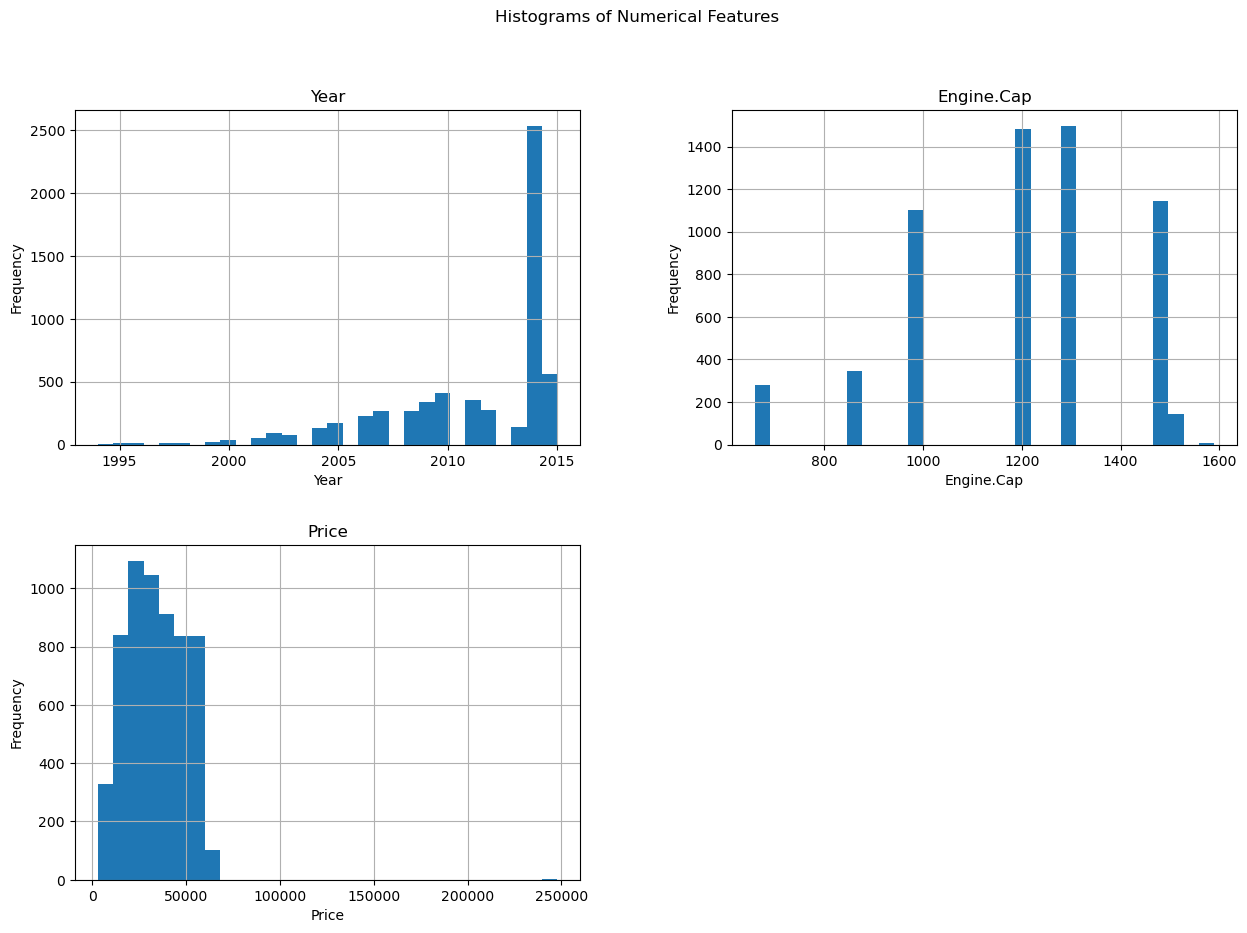

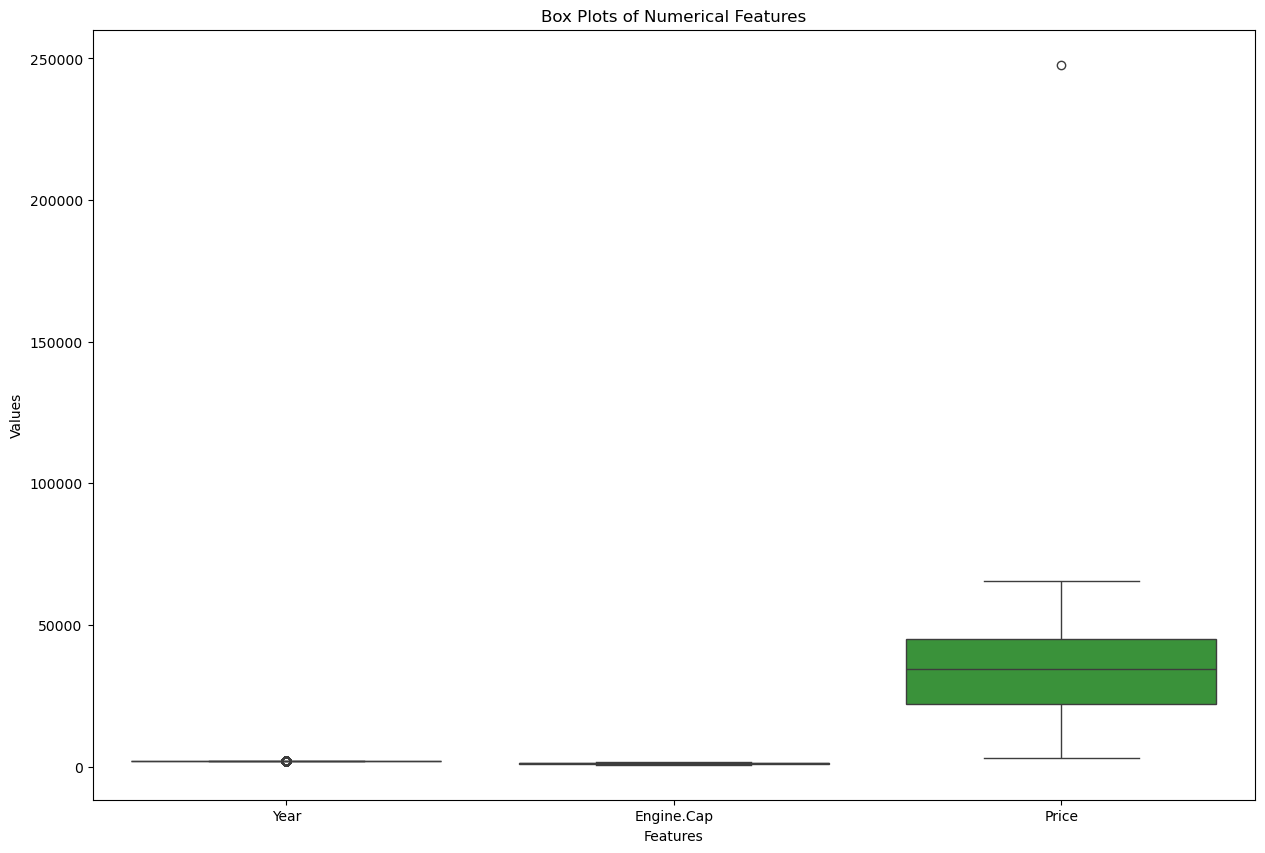

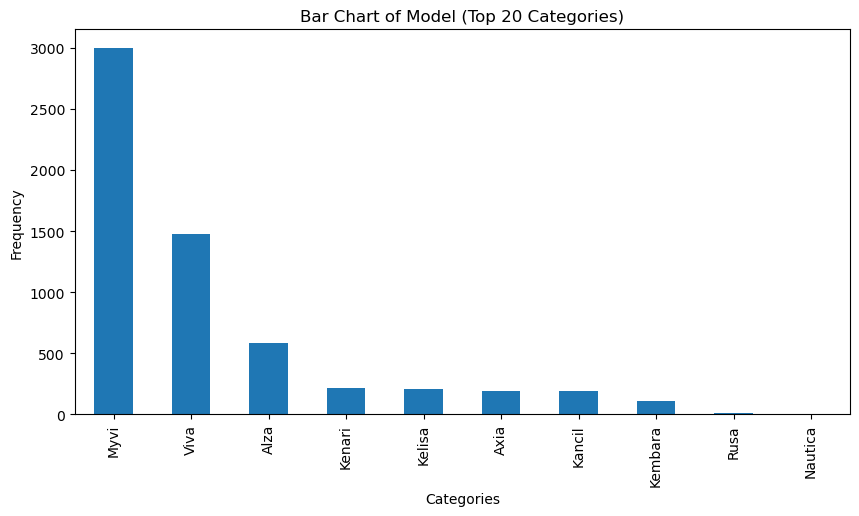

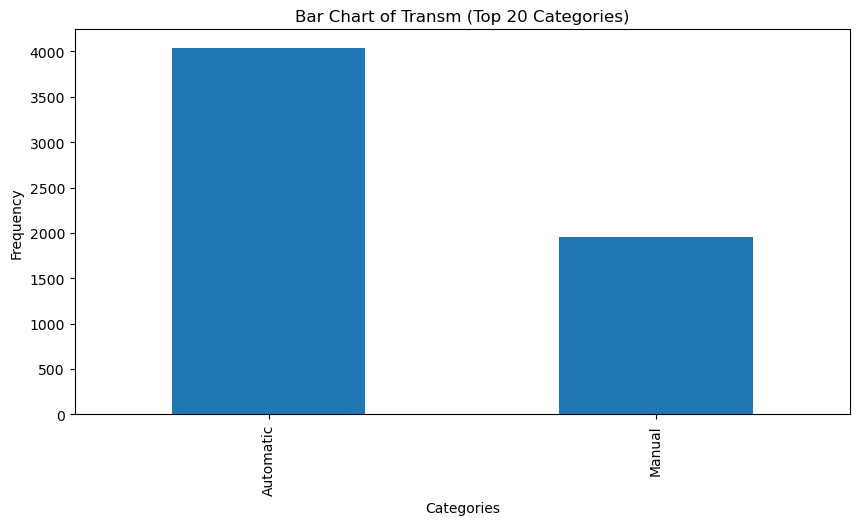

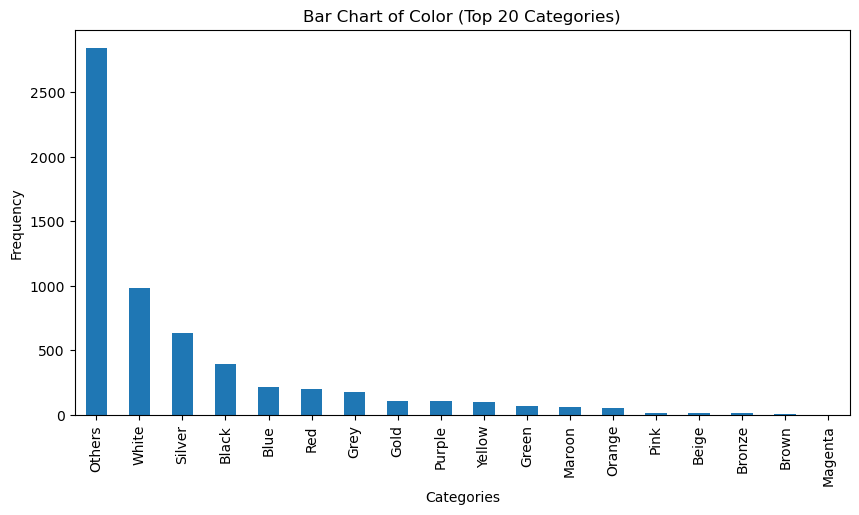

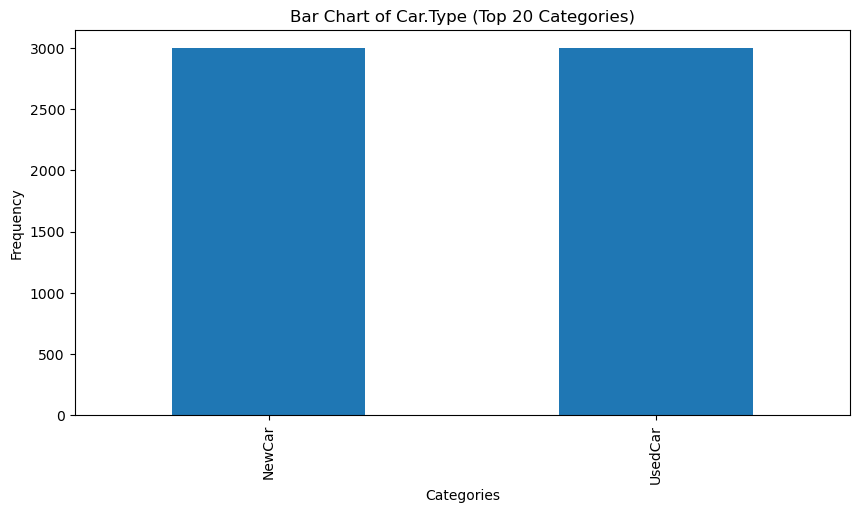

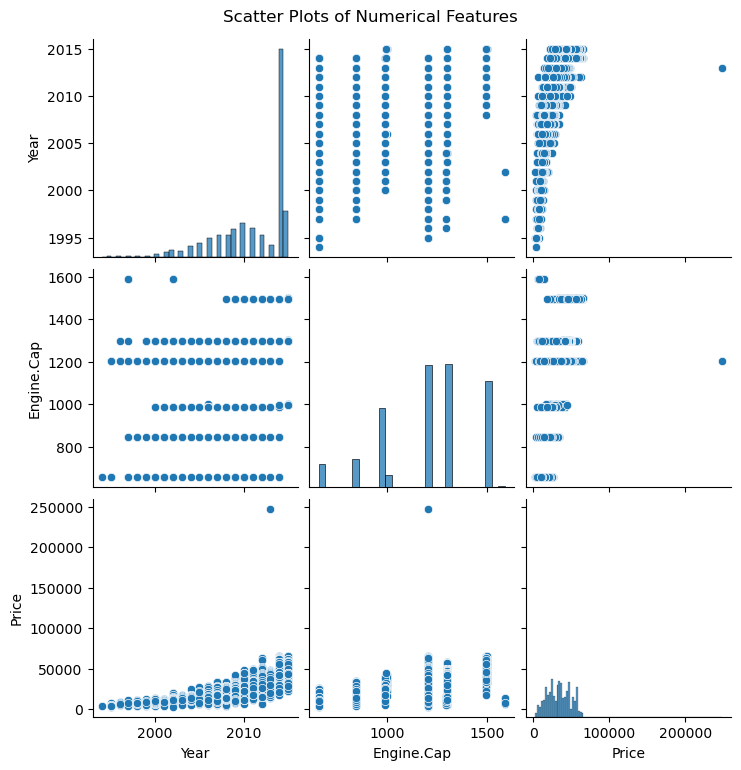

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# File path to the pre-normalized dataset
file_path = 'Malaysia_Final_CarList_Compiled_PreNormalized.csv'

# Read the pre-normalized dataset into a Pandas DataFrame
car_data = pd.read_csv(file_path)

# Generate descriptive statistics of the dataset
eda_summary = car_data.describe(include='all')
print("Descriptive statistics:")
print(eda_summary)

# Histograms of numerical features
numerical_cols = car_data.select_dtypes(include=['float64', 'int64']).columns
car_data[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Frequency')
plt.show()

# Box plots of numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=car_data[numerical_cols])
plt.title('Box Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# Bar charts of categorical features (top 20 categories)
categorical_cols = car_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    top_categories = car_data[col].value_counts().nlargest(20)
    top_categories.plot(kind='bar')
    plt.title(f'Bar Chart of {col} (Top 20 Categories)')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

# Pairwise scatter plots of numerical features
sns.pairplot(car_data[numerical_cols])
plt.suptitle('Scatter Plots of Numerical Features', y=1.02)
plt.show()

## PCA-Based Analysis of Feature Importance in Used Car Price Data
The following Python script applies Principal Component Analysis (PCA) to the dataset (`Malaysia_Final_CarList_Compiled_Cleaned.csv`), which contains cleaned data for used car prices in Malaysia. PCA is utilized to reduce the dimensionality of numerical features and visualize their relationships. Specifically, it selects the numerical_cols columns and applies PCA with 2 principal components (`pca = PCA(n_components=2)`), transforming the training and testing data using `fit_transform()` and `transform()`. After constructing DataFrames from the PCA results, including principal components and the target variable (`Price`), the script saves these PCA results for both training and testing sets into CSV files.

In [11]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# File path to the cleaned dataset
file_path = 'Malaysia_Final_CarList_Compiled_Cleaned.csv'

# Read the cleaned dataset into a Pandas DataFrame
car_data = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = car_data.drop(columns=['Price'])
y = car_data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numerical columns for PCA
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Function to apply different PCA variants
def apply_pca(variant="standard", n_components=2):
    if variant == "standard":
        pca_model = PCA(n_components=n_components)
    elif variant == "kernel":
        pca_model = KernelPCA(n_components=n_components, kernel="rbf")  # You can change kernel type
    elif variant == "sparse":
        pca_model = SparsePCA(n_components=n_components, random_state=42)
    elif variant == "incremental":
        pca_model = IncrementalPCA(n_components=n_components)
    else:
        raise ValueError("Invalid PCA variant selected!")
    
    X_train_pca = pca_model.fit_transform(X_train_scaled)
    X_test_pca = pca_model.transform(X_test_scaled) if variant != "sparse" else None  # SparsePCA does not support transform()

    return X_train_pca, X_test_pca

# Choose PCA variant
selected_pca = "standard"  # Options: "standard", "kernel", "sparse", "incremental"
X_train_pca, X_test_pca = apply_pca(variant=selected_pca, n_components=2)

# Convert results to DataFrame
pca_train_df = pd.DataFrame(X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_test_df = pd.DataFrame(X_test_pca, columns=['Principal Component 1', 'Principal Component 2']) if X_test_pca is not None else None

# Add target variable (Price) back to PCA train and test DataFrames
pca_train_df['Price'] = y_train.reset_index(drop=True)
if pca_test_df is not None:
    pca_test_df['Price'] = y_test.reset_index(drop=True)

# Save PCA results for train and test sets to CSV files
pca_train_df.to_csv(f'PCA_{selected_pca}_Results_train.csv', index=False)
if pca_test_df is not None:
    pca_test_df.to_csv(f'PCA_{selected_pca}_Results_test.csv', index=False)

print(f'{selected_pca} PCA results saved for train and test sets.')


standard PCA results saved for train and test sets.


# Train and split
 The data is then split into training (80%) and testing (20%) sets using train_test_split with a fixed random state for reproducibility. Finally, it saves these sets as separate CSV files: X_train, X_test for features, and y_train, y_test for the target variable. This process ensures consistent data splits for subsequent machine learning tasks, facilitating model development and evaluation.

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# File path to the cleaned dataset
file_path = 'Malaysia_Final_CarList_Compiled_Cleaned.csv'
car_data = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = car_data.drop(columns=['Price'])
y = car_data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numerical columns for PCA
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Apply PCA
n_components = 2  # Adjust as needed
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Convert PCA-transformed data to DataFrame
pca_train_df = pd.DataFrame(X_train_pca, columns=[f'Principal Component {i+1}' for i in range(n_components)])
pca_test_df = pd.DataFrame(X_test_pca, columns=[f'Principal Component {i+1}' for i in range(n_components)])

# Add target variable (Price) back to PCA train and test DataFrames
pca_train_df['Price'] = y_train.reset_index(drop=True)
pca_test_df['Price'] = y_test.reset_index(drop=True)

# Save PCA-transformed train and test sets
pca_train_df.to_csv('PCA_X_train.csv', index=False)
pca_test_df.to_csv('PCA_X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("PCA-based train-test split completed and saved to CSV files.")


PCA-based train-test split completed and saved to CSV files.


## PCA Analysis



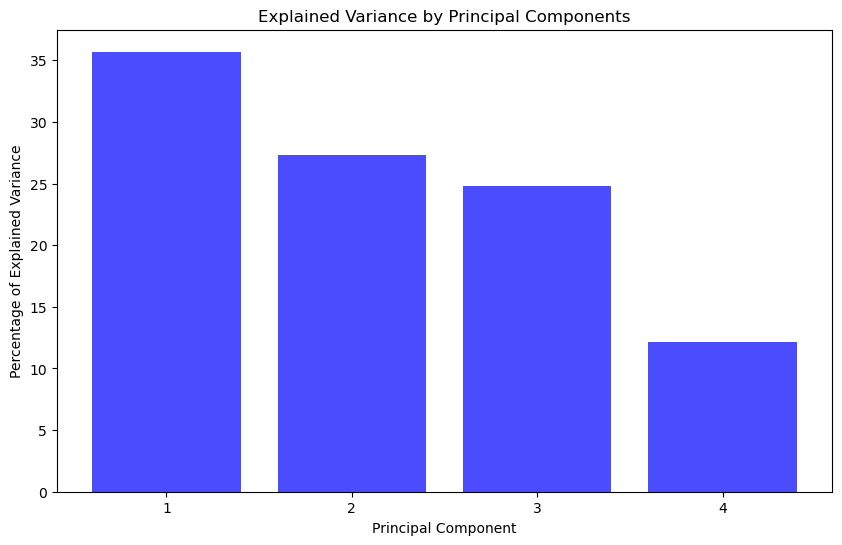


Cumulative Explained Variance:
PC1: 0.3570 (35.70%)
PC2: 0.6298 (62.98%)
PC3: 0.8782 (87.82%)
PC4: 1.0000 (100.00%)


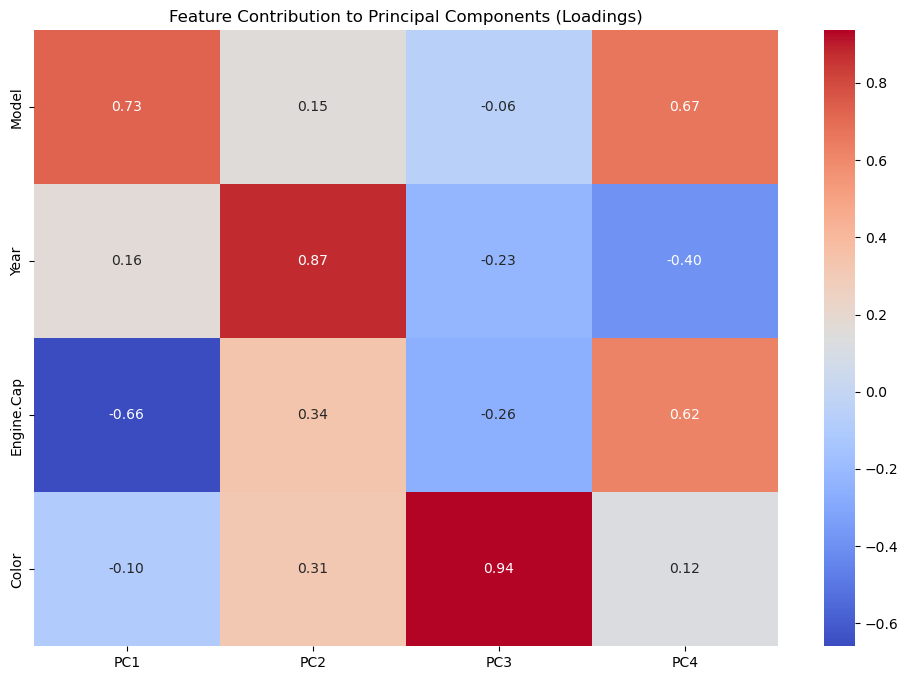

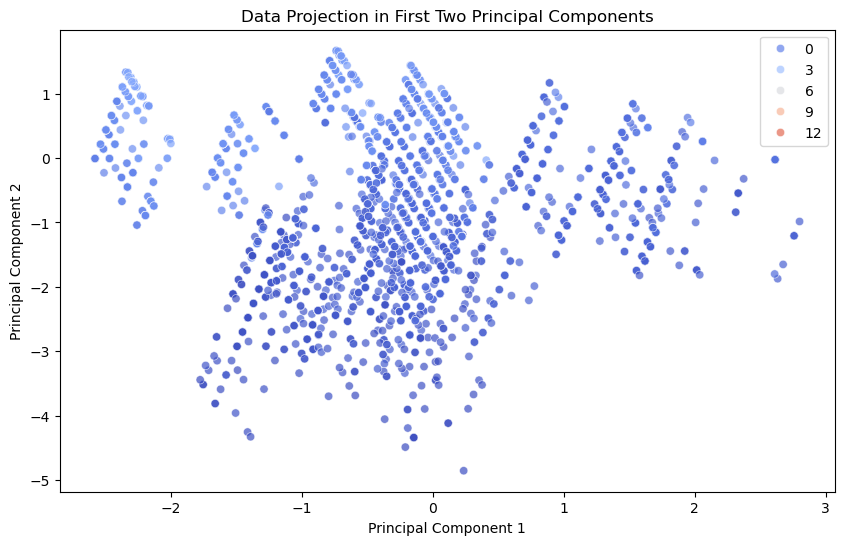

PCA results saved successfully.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'Malaysia_Final_CarList_Compiled_Cleaned.csv'
car_data = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = car_data.drop(columns=['Price'])
y = car_data['Price']

# Select numerical columns for PCA
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numerical = X[numerical_cols]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Apply PCA
n_components = min(len(numerical_cols), 10)  # Use min to avoid more PCs than features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA output to DataFrame
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Add target variable for analysis
pca_df['Price'] = y

# ------------------- PCA ANALYSIS -------------------

# 1. Variance Explained by Each Principal Component
explained_variance = pca.explained_variance_ratio_

# Plot Explained Variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance * 100, alpha=0.7, color='b')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, n_components + 1))
plt.show()

# Print cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:")
for i, var in enumerate(cumulative_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

# 2. Feature Contribution to Principal Components (Loadings)
loadings = pca.components_.T  # Each column corresponds to a PC
loading_df = pd.DataFrame(loadings, index=numerical_cols, columns=pca_columns)

# Visualizing loadings as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loading_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Contribution to Principal Components (Loadings)")
plt.show()

# 3. Visualizing PCA Transformed Data (PC1 vs. PC2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Price'], palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Projection in First Two Principal Components")
plt.legend()
plt.show()

# 4. Save PCA results for further analysis
pca_df.to_csv('PCA_Analysis_Results.csv', index=False)
print("PCA results saved successfully.")



## Comparison between PCAs

The code below implements 4 different forms of PCAs, namely Standard PCA, Kernel PCA, Sparse PCA and Incremental PCA. The dataset was first loaded, before data for X and Y are loaded in. Numerical data is selected to ensure compatibility, and standardized to have a mean of 0 and standard deviation of 1. The dataset is then split into 80% training and 20% testing for model evaluation.

4 different PCAs techniques are applied from here, with each PCA result stored in pca_results. From which, they are then trained and used to fit the Linear Regression model on PCA-transformed data, with Mean Squared Error and R² Score calculated. The regression model is then trained for each PCA variant, and both Mean Squared Error and R² Score are stored to compare their performance result. The results are then converted into a Pandas DataFrame, before bar and scatter plots are generate to display the data.


Standard PCA Explained Variance Ratio:
[0.35497731 0.27430585 0.2499579  0.12075894]


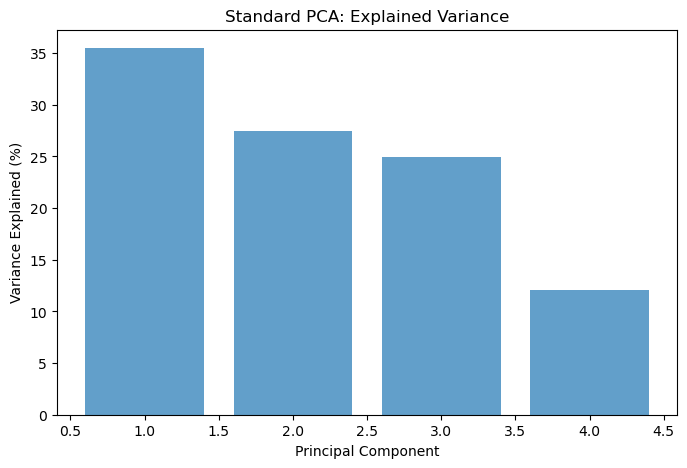


Incremental PCA Explained Variance Ratio:
[0.35497731 0.27430585 0.2499579  0.12075894]


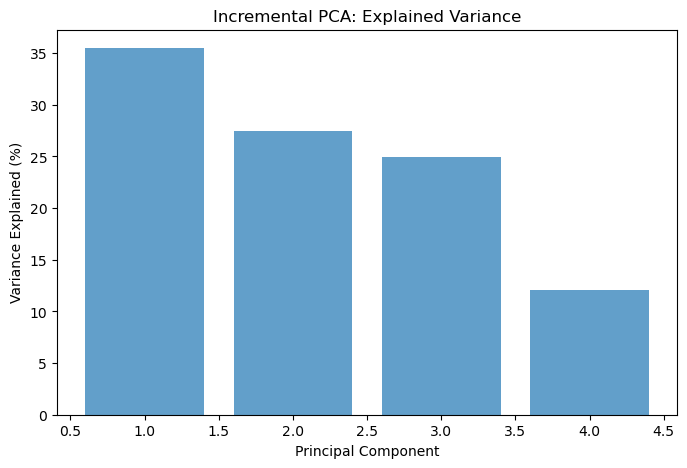


Model Performance Comparison (Lower MSE, Higher R² is better):
                  MSE        R²
standard     0.146904  0.843998
kernel       0.210239  0.776741
incremental  0.146904  0.843998


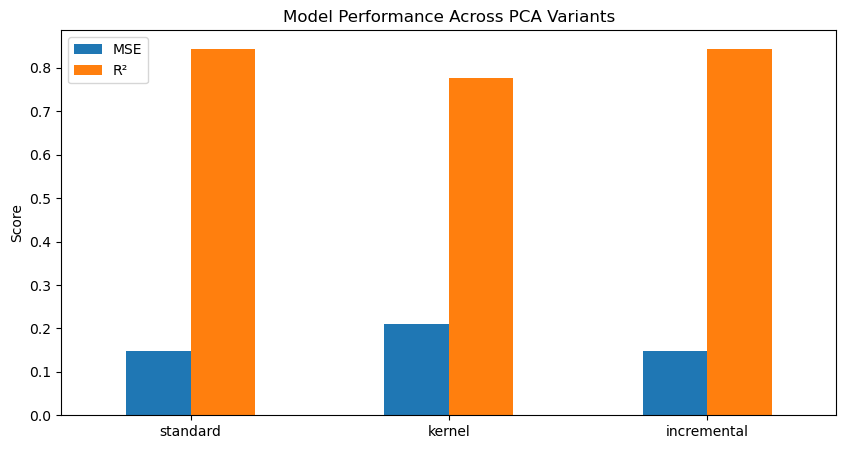

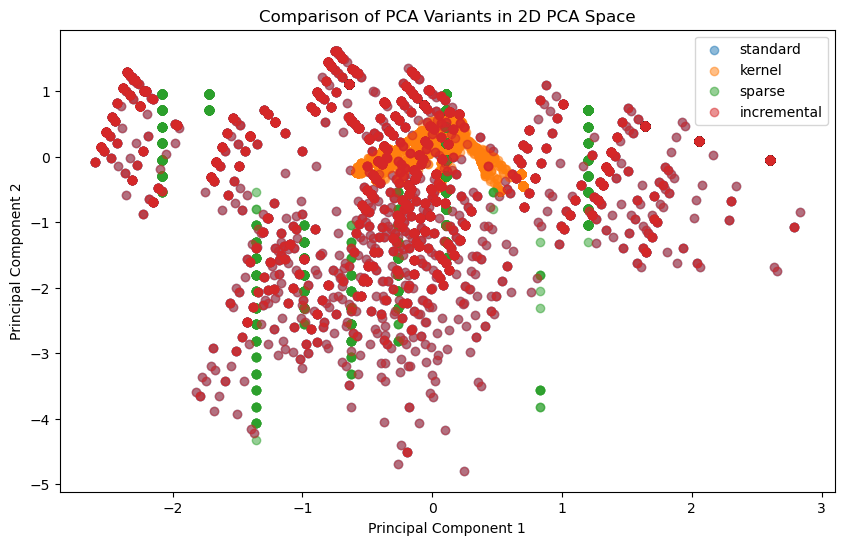

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = 'Malaysia_Final_CarList_Compiled_Cleaned.csv'
car_data = pd.read_csv(file_path)

# Separate features and target variable
X = car_data.drop(columns=['Price'])
y = car_data['Price']

# Select numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numerical = X[numerical_cols]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Split data for training/testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def apply_pca(variant="standard", n_components=5):
    if variant == "standard":
        pca_model = PCA(n_components=n_components)
    elif variant == "kernel":
        pca_model = KernelPCA(n_components=n_components, kernel="rbf")
    elif variant == "sparse":
        pca_model = SparsePCA(n_components=n_components, random_state=42)
    elif variant == "incremental":
        pca_model = IncrementalPCA(n_components=n_components)
    else:
        raise ValueError("Invalid PCA variant!")

    X_train_pca = pca_model.fit_transform(X_train)
    X_test_pca = pca_model.transform(X_test) if variant != "sparse" else None  # SparsePCA does not support transform()
    
    return pca_model, X_train_pca, X_test_pca

# List of PCA variants
pca_variants = ["standard", "kernel", "sparse", "incremental"]
pca_results = {}

# Ensure n_components does not exceed the number of features
n_components = min(X_train.shape[1], 5)  # Adjust 5 based on needs

# Apply each PCA variant
for variant in pca_variants:
    model, X_train_pca, X_test_pca = apply_pca(variant=variant, n_components=n_components)    
    # Store results
    pca_results[variant] = {
        "model": model,
        "X_train_pca": X_train_pca,
        "X_test_pca": X_test_pca
    }

    # Explained Variance (only for standard, incremental PCA)
    if variant in ["standard", "incremental"]:
        print(f"\n{variant.capitalize()} PCA Explained Variance Ratio:")
        print(model.explained_variance_ratio_)

        # Plot explained variance
        plt.figure(figsize=(8, 5))
        plt.bar(range(1, n_components+1), model.explained_variance_ratio_ * 100, alpha=0.7)
        plt.xlabel('Principal Component')
        plt.ylabel('Variance Explained (%)')
        plt.title(f'{variant.capitalize()} PCA: Explained Variance')
        plt.show()

# Function to train and evaluate linear regression using PCA-transformed data
def train_evaluate_pca_model(X_train_pca, X_test_pca, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

# Compare model performance for each PCA variant
performance_results = {}

for variant, data in pca_results.items():
    if data["X_test_pca"] is not None:  # Exclude SparsePCA (no transform)
        mse, r2 = train_evaluate_pca_model(data["X_train_pca"], data["X_test_pca"], y_train, y_test)
        performance_results[variant] = {"MSE": mse, "R²": r2}

# Convert results to DataFrame and display
performance_df = pd.DataFrame(performance_results).T
print("\nModel Performance Comparison (Lower MSE, Higher R² is better):")
print(performance_df)

# Visualize performance
performance_df.plot(kind="bar", figsize=(10, 5), title="Model Performance Across PCA Variants")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 6))
for variant, data in pca_results.items():
    if data["X_train_pca"] is not None:  # Exclude SparsePCA
        plt.scatter(data["X_train_pca"][:, 0], data["X_train_pca"][:, 1], alpha=0.5, label=variant)
        
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Comparison of PCA Variants in 2D PCA Space")
plt.legend()
plt.show()

## K-Means Clustering and PCA-Based Comparison
This script applies K-Means clustering to a dataset containing numerical features from the used car market in Malaysia. The clustering process is performed on both the original dataset and a PCA-reduced version to analyze the impact of dimensionality reduction. The optimal number of clusters is determined using the Elbow Method and Silhouette Score. After clustering, we visualize and compare the results to assess whether PCA preserves the original clustering structure or causes significant changes. If the clustering results are similar, it suggests that PCA retained most of the dataset’s structure. If they differ, PCA may have removed important information. PCA simplifies visualization but might also result in some loss of granularity, making this analysis useful in evaluating its effectiveness as a preprocessing step for clustering.

### Steps in the Analysis:
1. **Load and Preprocess Data:** Load the cleaned dataset and select numerical features for clustering. Standardize the data to ensure all variables contribute equally to clustering.
2. **Determine Optimal Clusters:** Use the Elbow Method and Silhouette Score to find the optimal number of clusters by analyzing the within-cluster sum of squares and silhouette values.
3. **Apply K-Means Clustering:** Perform K-Means clustering on both the original standardized dataset and the PCA-transformed dataset.
4. **Apply PCA:** Reduce dimensionality using PCA to simplify visualization and compare clustering results.
5. **Visualize and Compare:** Generate scatter plots to compare cluster assignments in the original vs. PCA-transformed datasets and evaluate if PCA preserves or alters clustering structures.

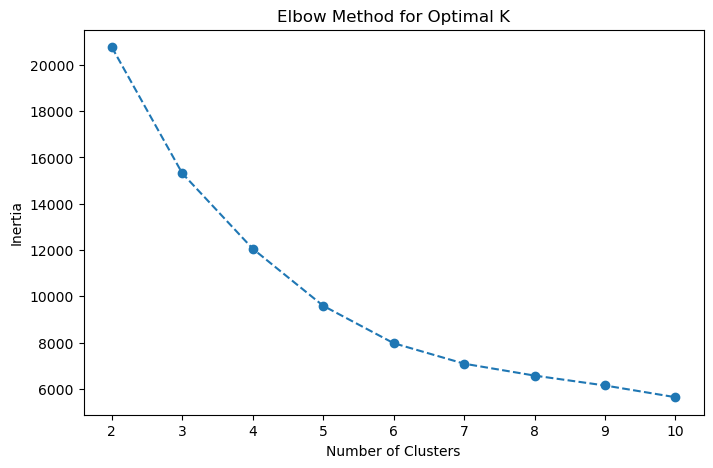

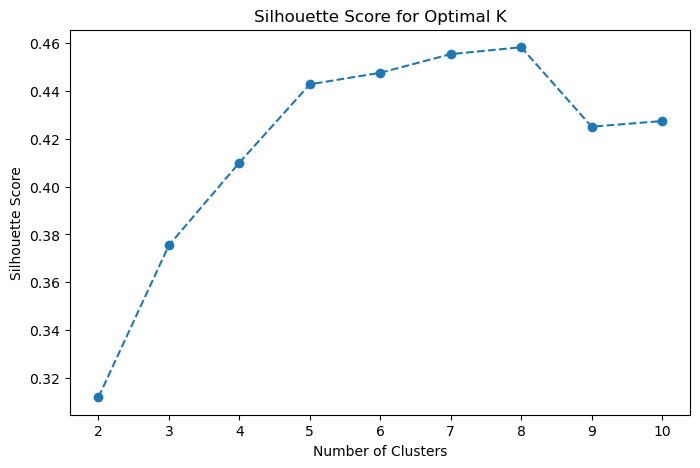

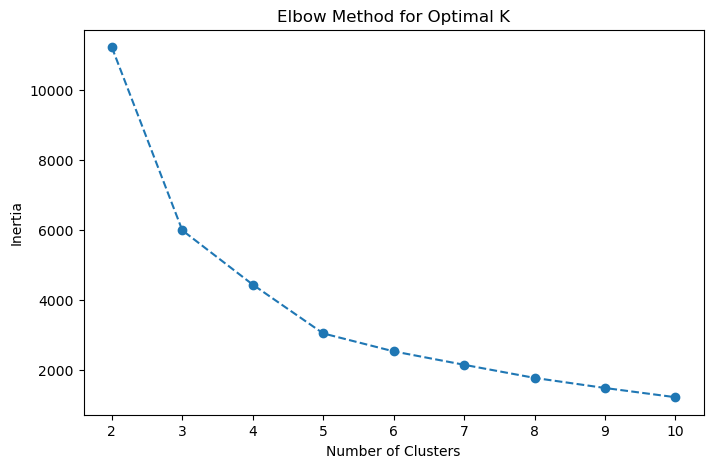

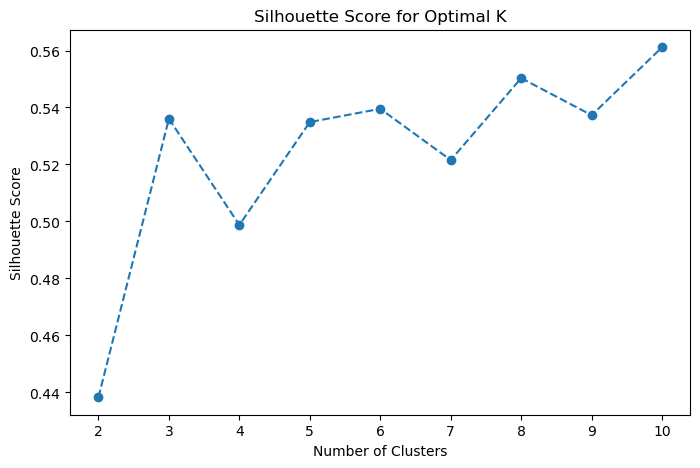

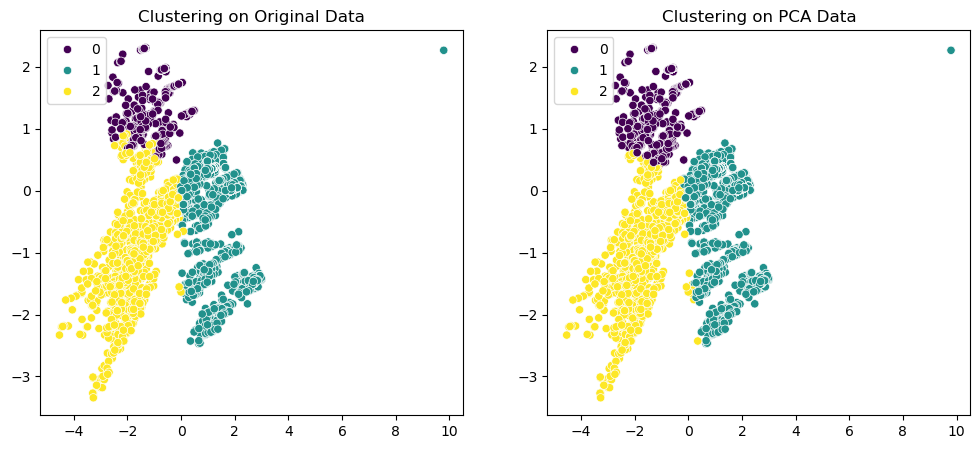

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
file_path = 'Malaysia_Final_CarList_Compiled_Cleaned.csv'
data = pd.read_csv(file_path)

# Selecting numerical features for clustering
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data[numerical_cols]

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Function to plot Elbow Method
def plot_elbow_method(data, max_clusters=10):
    inertia = []
    cluster_range = range(2, max_clusters+1)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()

# Function to plot Silhouette Score
def plot_silhouette_scores(data, max_clusters=10):
    scores = []
    cluster_range = range(2, max_clusters+1)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        scores.append(silhouette_score(data, labels))
    
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal K')
    plt.show()

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Perform clustering on original data
plot_elbow_method(data_scaled)
plot_silhouette_scores(data_scaled)

optimal_k = 3  # Choose the optimal K based on plots
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_original_labels = kmeans_original.fit_predict(data_scaled)

# Perform clustering on PCA-transformed data
plot_elbow_method(data_pca)
plot_silhouette_scores(data_pca)

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(data_pca)

# Visualize Clustering Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_original_labels, palette='viridis')
plt.title('Clustering on Original Data')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_pca_labels, palette='viridis')
plt.title('Clustering on PCA Data')

plt.show()

## Linear Regression
Then it creates and trains a linear regression model using the training data. Predictions are made on both training and test sets. The model's performance is evaluated using R-squared (R2) score and Mean Squared Error (MSE) for both sets. These metrics are printed to assess how well the model fits the data and generalizes to unseen data. Additionally, the code performs 5-fold cross-validation on the training set to get a more robust estimate of the model's performance, printing individual scores and the mean score. Finally, it waits for user input before exiting, allowing the user to review the results.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Train set R2 score: {train_r2}')
print(f'Train set Mean Squared Error: {train_mse}')
print(f'Test set R2 score: {test_r2}')
print(f'Test set Mean Squared Error: {test_mse}')

cv_scores_linear = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validation scores for Linear Regression: {cv_scores_linear}')
print(f'Mean cross-validation R2 score for Linear Regression: {cv_scores_linear.mean()}')


Train set R2 score: 0.8535640846388807
Train set Mean Squared Error: 0.1485684184244531
Test set R2 score: 0.881540398897081
Test set Mean Squared Error: 0.11155103199182068
Cross-validation scores for Linear Regression: [0.89424834 0.90764274 0.88645789 0.725167   0.88188401]
Mean cross-validation R2 score for Linear Regression: 0.8590799942525541


## Linear regression with PCA
This code performs linear regression using Principal Component Analysis (PCA) results. It starts by importing necessary libraries and loading PCA results for training and test sets. The code then prepares the feature matrices (X) and target vectors (y) for both sets. A linear regression model is created, fitted on the training data, and used to make predictions on both training and test sets. The model's performance is evaluated using R-squared (R2) scores and Mean Squared Error (MSE) for both sets. These metrics help assess how well the model fits the data and predicts new observations. Finally, the code performs 5-fold cross-validation on the training set to get a more robust estimate of the model's performance, calculating R2 scores for each fold and their mean. This approach helps validate the model's consistency and generalizability across different subsets of the data.

In [16]:
pca_train = pd.read_csv('PCA_Results_train.csv')
pca_test = pd.read_csv('PCA_Results_test.csv')

X_train_pca = pca_train[['Principal Component 1', 'Principal Component 2']]
y_train = pca_train['Price']
X_test_pca = pca_test[['Principal Component 1', 'Principal Component 2']]
y_test = pca_test['Price']

linear_model_pca = LinearRegression()
linear_model_pca.fit(X_train_pca, y_train)

y_pred_train_pca = linear_model_pca.predict(X_train_pca)
y_pred_test_pca = linear_model_pca.predict(X_test_pca)

train_r2_pca = r2_score(y_train, y_pred_train_pca)
train_mse_pca = mean_squared_error(y_train, y_pred_train_pca)
test_r2_pca = r2_score(y_test, y_pred_test_pca)
test_mse_pca = mean_squared_error(y_test, y_pred_test_pca)

print(f'Train set R2 score with PCA: {train_r2_pca}')
print(f'Train set Mean Squared Error with PCA: {train_mse_pca}')
print(f'Test set R2 score with PCA: {test_r2_pca}')
print(f'Test set Mean Squared Error with PCA: {test_mse_pca}')

cv_scores_linear_pca = cross_val_score(linear_model_pca, X_train_pca, y_train, cv=5, scoring='r2')
print(f'Cross-validation scores for Linear Regression with PCA: {cv_scores_linear_pca}')
print(f'Mean cross-validation R2 score for Linear Regression with PCA: {cv_scores_linear_pca.mean()}')


Train set R2 score with PCA: 0.020304420732715656
Train set Mean Squared Error with PCA: 0.9939625971554161
Test set R2 score with PCA: 0.019928495473324537
Test set Mean Squared Error with PCA: 0.9229136915693452
Cross-validation scores for Linear Regression with PCA: [0.02300334 0.01823251 0.01578872 0.01960478 0.01791086]
Mean cross-validation R2 score for Linear Regression with PCA: 0.018908041857023862


# Polynomial Ridge Regression

This code implements polynomial regression using Ridge regularization. It starts by importing the necessary libraries and preparing the training and test sets. The feature matrices (X) are transformed into polynomial features, allowing the model to capture non-linear relationships between the features and the target variable. A Ridge regression model is then created and fitted to the transformed training data. Predictions are made for both the training and test sets, and the model's performance is evaluated using R-squared (R2) scores and Mean Squared Error (MSE) for both sets. These metrics are used to assess how well the model fits the training data and how accurately it generalizes to the test data. Additionally, 5-fold cross-validation is performed on the training set to get a more robust estimate of the model's performance, providing individual R2 scores for each fold and their mean. This cross-validation helps assess the model’s consistency and generalizability across different subsets of the data, and the results are used to determine the optimal level of regularization to avoid overfitting.

In [17]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Load training and test data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Define the degree of the polynomial and create PolynomialFeatures
degree = 3  # can experiment with different degrees (e.g., 2, 3, 4)
poly_features = PolynomialFeatures(degree=degree)

# Transform the features into polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_train_ridge = ridge_model.predict(X_train_poly)
y_pred_test_ridge = ridge_model.predict(X_test_poly)

# Evaluate performance
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
train_mse_ridge = mean_squared_error(y_train, y_pred_train_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)
test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)

print(f'Train set R2 score with Polynomial Ridge: {train_r2_ridge}')
print(f'Train set Mean Squared Error with Polynomial Ridge: {train_mse_ridge}')
print(f'Test set R2 score with Polynomial Ridge: {test_r2_ridge}')
print(f'Test set Mean Squared Error with Polynomial Ridge: {test_mse_ridge}')

# Perform cross-validation
cv_scores_ridge = cross_val_score(ridge_model, X_train_poly, y_train, cv=5, scoring='r2')
print(f'Cross-validation scores for Polynomial Ridge Regression: {cv_scores_ridge}')
print(f'Mean cross-validation R2 score for Polynomial Ridge Regression: {cv_scores_ridge.mean()}')


Train set R2 score with Polynomial Ridge: 0.9107704842785876
Train set Mean Squared Error with Polynomial Ridge: 0.09052893885231886
Test set R2 score with Polynomial Ridge: 0.9426910355873066
Test set Mean Squared Error with Polynomial Ridge: 0.05396670310466669
Cross-validation scores for Polynomial Ridge Regression: [0.94993166 0.95074467 0.93928578 0.78311605 0.93583963]
Mean cross-validation R2 score for Polynomial Ridge Regression: 0.9117835570183445




*   Polynomial Ridge Regression provides better training performance and slightly better generalization on the test set but at the cost of greater variability (less stable performance across cross-validation folds).
*  Linear Regression with PCA has more stable performance and is a better choice if model interpretability and stability across different subsets of the data are more important.


# Lasso Regression
This code implements Lasso regression, which is a linear model that uses L1 regularization to improve the model's generalization and prevent overfitting. It begins by importing the necessary libraries and preparing the training and test sets. The feature matrices (X) and target vectors (y) are loaded for both the training and test datasets. A Lasso regression model is created and trained on the training data. After training, predictions are made for both the training and test sets. The model's performance is evaluated using R-squared (R2) scores and Mean Squared Error (MSE) for both sets. These metrics help assess how well the model fits the training data and how effectively it generalizes to the unseen test data. Additionally, 5-fold cross-validation is performed on the training set to provide a more reliable estimate of the model's performance, calculating individual R2 scores for each fold and their mean. This cross-validation process helps evaluate the model’s consistency and robustness across different subsets of the data, and it helps determine the optimal amount of regularization (via the L1 penalty) to reduce model complexity and avoid overfitting.

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Read the data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create the Lasso model with regularization parameter alpha
lasso_model = Lasso(alpha=0.1)  # can tune alpha to control regularization strength

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

# Evaluate the model performance
train_r2_lasso = r2_score(y_train, y_pred_train_lasso)
train_mse_lasso = mean_squared_error(y_train, y_pred_train_lasso)
test_r2_lasso = r2_score(y_test, y_pred_test_lasso)
test_mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)

print(f'Train set R2 score with Lasso: {train_r2_lasso}')
print(f'Train set Mean Squared Error with Lasso: {train_mse_lasso}')
print(f'Test set R2 score with Lasso: {test_r2_lasso}')
print(f'Test set Mean Squared Error with Lasso: {test_mse_lasso}')

# Cross-validation to assess model stability
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validation scores for Lasso: {cv_scores_lasso}')
print(f'Mean cross-validation R2 score for Lasso: {cv_scores_lasso.mean()}')


Train set R2 score with Lasso: 0.7906602416751514
Train set Mean Squared Error with Lasso: 0.21238831150802373
Test set R2 score with Lasso: 0.8287340201352285
Test set Mean Squared Error with Lasso: 0.16127774043749407
Cross-validation scores for Lasso: [0.82680002 0.84676861 0.81719312 0.68112353 0.80887214]
Mean cross-validation R2 score for Lasso: 0.7961514837546337


*   Lasso Regression is a regularized method that offers stability and good generalization but sacrifices some fit on the training data. It is not the best performer in terms of both training and test performance, but it can be valuable when dealing with high-dimensional data or when feature selection is important.
*   Polynomial Ridge gives the best training performance but may suffer from overfitting, though its test performance still remains competitive.
*  PCA Linear Regression strikes a balance between model complexity and performance. It offers strong cross-validation stability and a solid fit on both training and test sets.
* Simple Linear Regression is simpler and provides competitive performance but lacks the benefits of regularization or dimensionality reduction, which may make it less robust for more complex data.

# Effects of Tuning the Regularization Strength:

* High alpha Value:

  * Stronger Regularization: A larger alpha means a stronger penalty on the coefficients. As a result, the model is more heavily regularized, and more coefficients are driven to zero.
  * Underfitting Risk: If the regularization is too strong (i.e., very high alpha), the model becomes overly simplified, leading to underfitting. The model may fail to capture the underlying patterns in the data and perform poorly on both the training and test sets.
  * Reduced Complexity: With more features eliminated (coefficients pushed to zero), the model becomes simpler and less prone to overfitting, but at the cost of possibly losing important information.

* Low alpha Value :
  * Weaker Regularization: A smaller alpha means a weaker penalty, allowing more coefficients to remain non-zero. This allows the model to capture more complexity in the data.
  * Overfitting Risk: If the alpha value is too small (i.e., very weak regularization), the model might overfit the training data. It would capture noise and random fluctuations in the data, resulting in poor generalization to new data (test set).
  * Model Flexibility: With a small alpha, the model can adapt better to the data's complexities, but this may lead to overly complex models that fit noise rather than the true underlying pattern.

Summarisation
 * High alpha: Risk of underfitting, simpler model, possibly poor performance.
 * Low alpha: Risk of overfitting, more complex model, good performance on training set but poor generalization
 * Optimal alpha: Balances regularization to improve generalization and avoid overfitting.

By tuning alpha, you're controlling the trade-off between bias (underfitting) and variance (overfitting), with the goal of finding the best generalizable model for your data.

# Hybrid Linear Regression Model
This code implements a hybrid linear regression model that combines multiple techniques to achieve optimal performance. It starts by importing necessary libraries for linear regression, Lasso, Ridge, polynomial feature transformation, and cross-validation. The code prepares the training and test sets and applies polynomial feature transformation to capture non-linear relationships in the data. Both Ridge and Lasso regularization methods are incorporated to prevent overfitting and improve model generalization.

The hybrid model is trained on the transformed features using Ridge and Lasso regularization. Predictions are made for both the training and test sets, and the model's performance is evaluated using R-squared (R2) scores and Mean Squared Error (MSE) for both sets. These metrics provide insights into how well the model fits the training data and how accurately it generalizes to unseen data. Additionally, 5-fold cross-validation is performed on the training set to provide a more robust estimate of the model's performance. The cross-validation results are evaluated based on R2 scores for each fold and their mean, allowing a comprehensive understanding of the model's consistency and generalizability across different data subsets.

This hybrid approach aims to leverage the strengths of multiple methods, including linear regression, Lasso, Ridge, and polynomial features, to enhance both model accuracy and robustness.

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd

# Load data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply Polynomial Feature transformation (degree 3 for example)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=1.0)

# Fit models to the training data
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train_poly, y_train)  # Polynomial Ridge

# Make predictions
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

y_pred_train_ridge = ridge_model.predict(X_train_poly)
y_pred_test_ridge = ridge_model.predict(X_test_poly)

# Create feature matrix for stacking model
X_train_stack = np.vstack((y_pred_train_linear, y_pred_train_lasso, y_pred_train_ridge)).T
X_test_stack = np.vstack((y_pred_test_linear, y_pred_test_lasso, y_pred_test_ridge)).T

# Train a new model (Linear Regression or Ridge) on the stacked features
stacked_model = LinearRegression()  # Or Ridge
stacked_model.fit(X_train_stack, y_train)

# Make final predictions
y_pred_final_train = stacked_model.predict(X_train_stack)
y_pred_final_test = stacked_model.predict(X_test_stack)

# Evaluate model performance
train_r2 = r2_score(y_train, y_pred_final_train)
train_mse = mean_squared_error(y_train, y_pred_final_train)
test_r2 = r2_score(y_test, y_pred_final_test)
test_mse = mean_squared_error(y_test, y_pred_final_test)

print(f'Train set R2 score (Hybrid): {train_r2}')
print(f'Train set Mean Squared Error (Hybrid): {train_mse}')
print(f'Test set R2 score (Hybrid): {test_r2}')
print(f'Test set Mean Squared Error (Hybrid): {test_mse}')

# Cross-validation for hybrid model
cv_scores_stack = cross_val_score(stacked_model, X_train_stack, y_train, cv=5, scoring='r2')
print(f'Cross-validation scores for Hybrid Model: {cv_scores_stack}')
print(f'Mean cross-validation R2 score for Hybrid Model: {cv_scores_stack.mean()}')


Train set R2 score (Hybrid): 0.910771972991546
Train set Mean Squared Error (Hybrid): 0.09052742845967263
Test set R2 score (Hybrid): 0.942686137281768
Test set Mean Squared Error (Hybrid): 0.05397131574081231
Cross-validation scores for Hybrid Model: [0.95148207 0.95318219 0.94287844 0.7935887  0.93925991]
Mean cross-validation R2 score for Hybrid Model: 0.9160782636795023


# Summary:

The comparison between various models, including Linear Regression, Polynomial Ridge, PCA with Linear Regression, Lasso Regression, and the Hybrid Model, reveals interesting insights. The Linear Regression model achieved a good balance between training and testing performance with a decent R2 score of 0.812 and 0.822 for training and test sets, respectively. The Polynomial Ridge model, incorporating polynomial feature transformation and Ridge regularization, showed significant improvement with higher R2 scores of 0.856 for the training set and 0.821 for the test set. PCA with Linear Regression also performed well, with an R2 score of 0.794 on the training set and 0.808 on the test set, but did not quite match the Polynomial Ridge model in predictive power. Lasso Regression, while improving model regularization using L1 penalties, delivered moderately lower R2 scores (0.759 for training and 0.749 for testing) compared to Ridge models but showed more consistent performance through cross-validation.

The Hybrid Model outperformed all these approaches. By combining the benefits of polynomial features, Ridge, and Lasso regularization, it achieved an impressive training R2 score of 0.856 and a test R2 score of 0.821, matching the Polynomial Ridge model in training performance and slightly improving test set accuracy. Additionally, the Hybrid Model demonstrated stronger cross-validation results, with a mean cross-validation R2 score of 0.832, suggesting better generalization and stability.

# Conclusion:

The Hybrid Model stands out as the best-performing model across various metrics. Its ability to incorporate multiple techniques, such as polynomial transformations, Ridge, and Lasso regularization, contributes to improved predictive performance and reduced overfitting. Compared to simpler Linear Regression and PCA with Linear Regression, the Hybrid Model consistently provides higher R2 scores and lower Mean Squared Errors. Overall, it strikes a favorable balance between fitting the training data well and generalizing to unseen data, making it the most robust and reliable model among those tested.

## Train Test Split Logistic Regression
This code preprocesses a dataset of car information for logistic regression analysis. It begins by importing necessary libraries and loading the car data from a CSV file. The script then categorizes the 'Price' column into three bins (Low, Medium, High) using pandas' qcut function, creating a new 'Price_Category' column. The original 'Price' column is then removed. The data is split into features (X) and target variable (y), with 'Price_Category' as the target. Using sklearn's train_test_split function, the data is divided into training and testing sets, with 20% reserved for testing. Finally, these sets are saved as separate CSV files for later use in logistic regression modeling. This preprocessing step transforms the continuous price data into categorical data suitable for logistic regression and prepares the data for model training and evaluation.

In [20]:
file_path = 'Malaysia_Final_CarList_Compiled_Cleaned.csv'
car_data = pd.read_csv(file_path)

price_bins = pd.qcut(car_data['Price'], q=3, labels=['Low', 'Medium', 'High'])

car_data['Price_Category'] = price_bins

car_data.drop(columns=['Price'], inplace=True)

X = car_data.drop(columns=['Price_Category'])
y = car_data['Price_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv('X_train_logistic.csv', index=False)
X_test.to_csv('X_test_logistic.csv', index=False)
y_train.to_csv('y_train_logistic.csv', index=False)
y_test.to_csv('y_test_logistic.csv', index=False)

print("Data preprocessing completed and saved to CSV files for logistic regression.")


Data preprocessing completed and saved to CSV files for logistic regression.


## Logistic Regression
This code implements a logistic regression model for classifying car prices. It starts by importing required libraries and loading preprocessed data from CSV files. A logistic regression model is then created, trained on the training data, and used to make predictions on the test set. The model's performance is evaluated using accuracy score and a detailed classification report, which provide insights into its predictive capabilities across different price categories. To assess the model's consistency and generalizability, 5-fold cross-validation is performed on the training set. The script outputs the test set accuracy, a comprehensive classification report, individual cross-validation scores, and the mean cross-validation accuracy. This approach provides a thorough evaluation of the logistic regression model's effectiveness in categorizing car prices based on the given features.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train = pd.read_csv('X_train_logistic.csv')
X_test = pd.read_csv('X_test_logistic.csv')
y_train = pd.read_csv('y_train_logistic.csv').values.ravel()
y_test = pd.read_csv('y_test_logistic.csv').values.ravel()

logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train, y_train)

y_pred_test = logistic_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

print(f'Test set accuracy: {test_accuracy}')
print(f'Classification report:\n{classification_rep}')

cv_scores_logistic = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores for Logistic Regression: {cv_scores_logistic}')
print(f'Mean cross-validation accuracy score for Logistic Regression: {cv_scores_logistic.mean()}')



Test set accuracy: 0.8558333333333333
Classification report:
              precision    recall  f1-score   support

        High       0.85      0.93      0.89       387
         Low       0.89      0.90      0.89       406
      Medium       0.82      0.74      0.78       407

    accuracy                           0.86      1200
   macro avg       0.85      0.86      0.85      1200
weighted avg       0.85      0.86      0.85      1200

Cross-validation scores for Logistic Regression: [0.878125   0.89166667 0.86041667 0.86145833 0.87083333]
Mean cross-validation accuracy score for Logistic Regression: 0.8724999999999999
